In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle

In [7]:
dataset = pd.read_csv("/content/Rainfall.csv")

In [8]:
dataset.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [9]:
dataset.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [11]:
dataset.groupby("rainfall").sum()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
rainfall,,,,,,,,,,,
no,1828,118705.5,3167.3,2814.3,2569.0,2195.7,8541,5997,887.6,12060.0,2255.2
yes,3939,252324.3,6418.7,5877.2,5444.4,5120.3,20804,20036,729.9,24990.0,5605.8


In [12]:
dataset.shape

(366, 12)

In [13]:
dataset["day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [14]:
dataset.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [15]:
dataset.columns= dataset.columns.str.strip()

In [16]:
dataset.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [17]:
dataset = dataset.drop(columns=["day"])

In [18]:
dataset.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [19]:
dataset.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,1


In [20]:
dataset["winddirection"].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [21]:
dataset["winddirection"]= dataset["winddirection"].fillna(dataset["winddirection"].mode()[0])
dataset["windspeed"]= dataset["windspeed"].fillna(dataset["windspeed"].median())

In [22]:
dataset["windspeed"].median()

20.5

In [23]:
dataset["winddirection"].mode()[0]

np.float64(20.0)

In [24]:
dataset.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,0


In [25]:
dataset["rainfall"]= dataset["rainfall"].map({"yes":1,"no":0})

In [26]:
dataset.tail()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,1022.7,18.8,17.7,16.9,15.0,84,90,1,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,1,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,1,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,1,1.2,20.0,20.9
365,1026.4,20.5,17.8,15.5,13.0,74,66,0,5.7,20.0,23.3


In [27]:
sns.set(style="whitegrid")

In [28]:
dataset.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [29]:
dataset.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

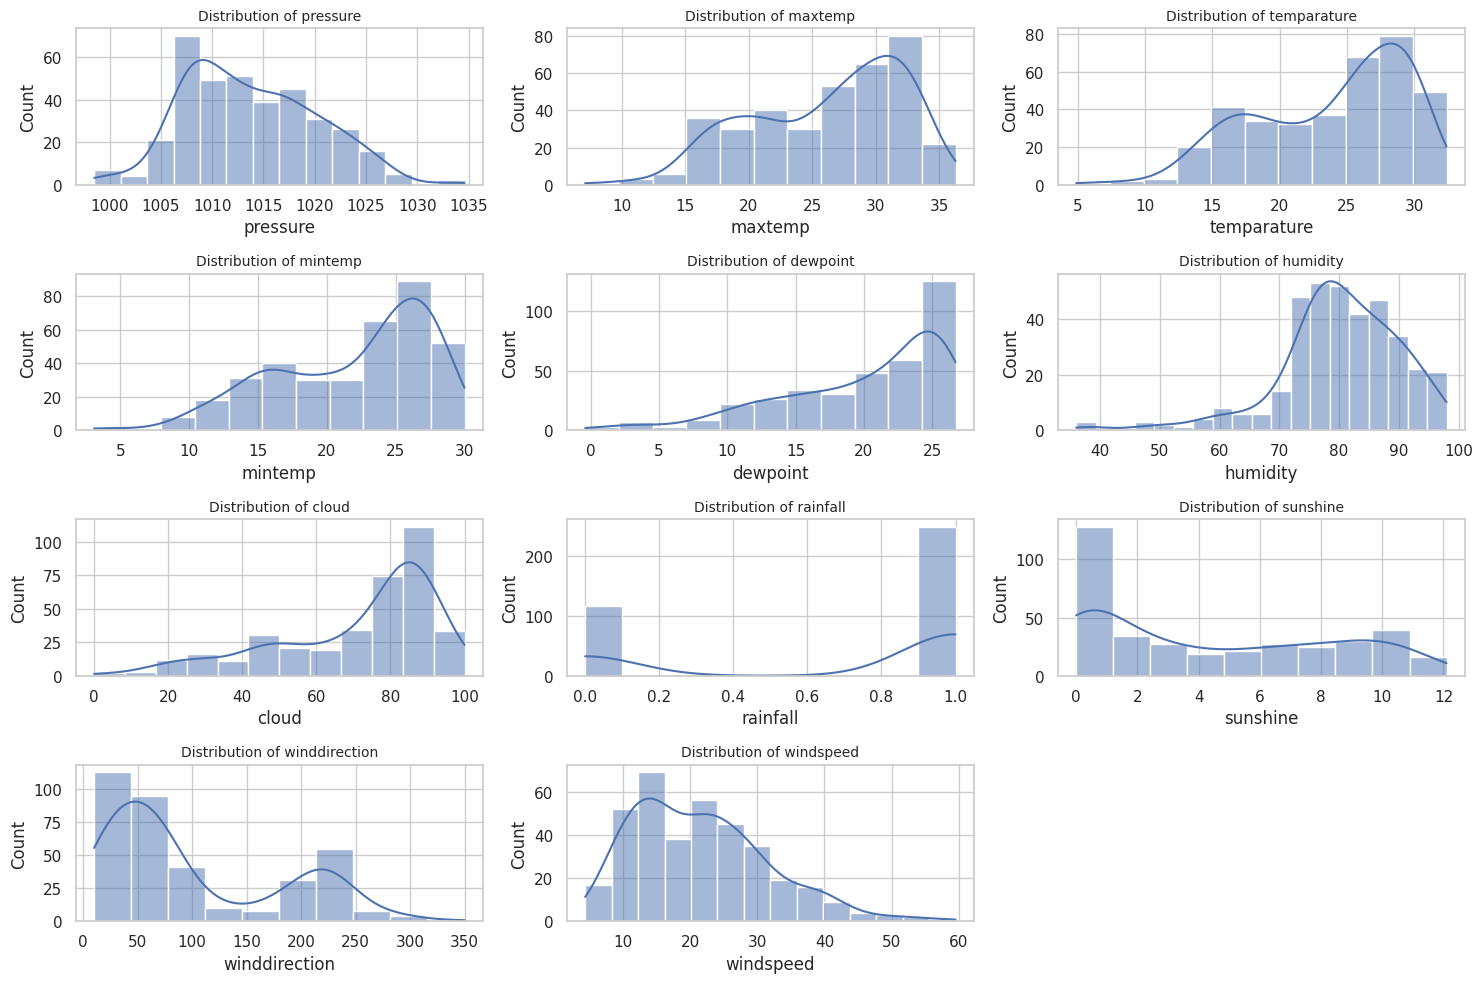

In [30]:
plt.figure(figsize=(15, 10))


columns = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
           'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed']


for i, column in enumerate(columns, 1):
    ax = plt.subplot(4, 3, i)
    sns.histplot(data=dataset[column], kde=True, ax=ax)
    plt.title(f"Distribution of {column}", fontsize=10)

plt.tight_layout()
plt.show()

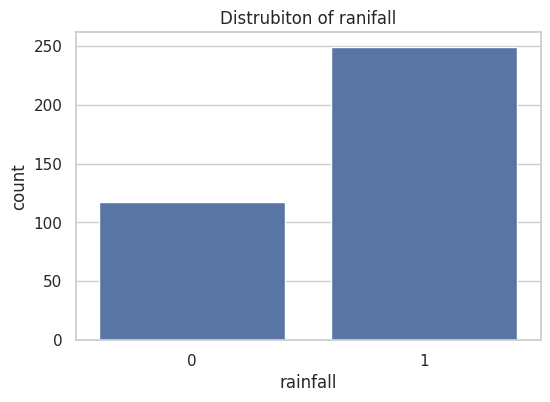

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(x="rainfall",data=dataset)
plt.title("Distrubiton of ranifall")
plt.show()

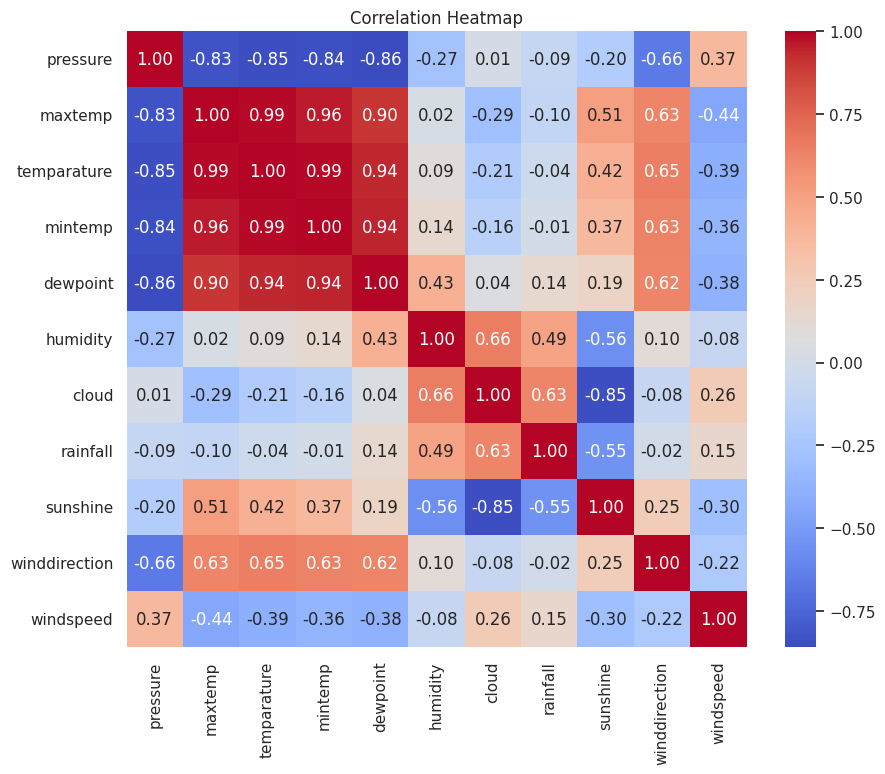

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(),annot=True,cmap="coolwarm" ,fmt=".2f" )
plt.title("Correlation Heatmap")
plt.show()

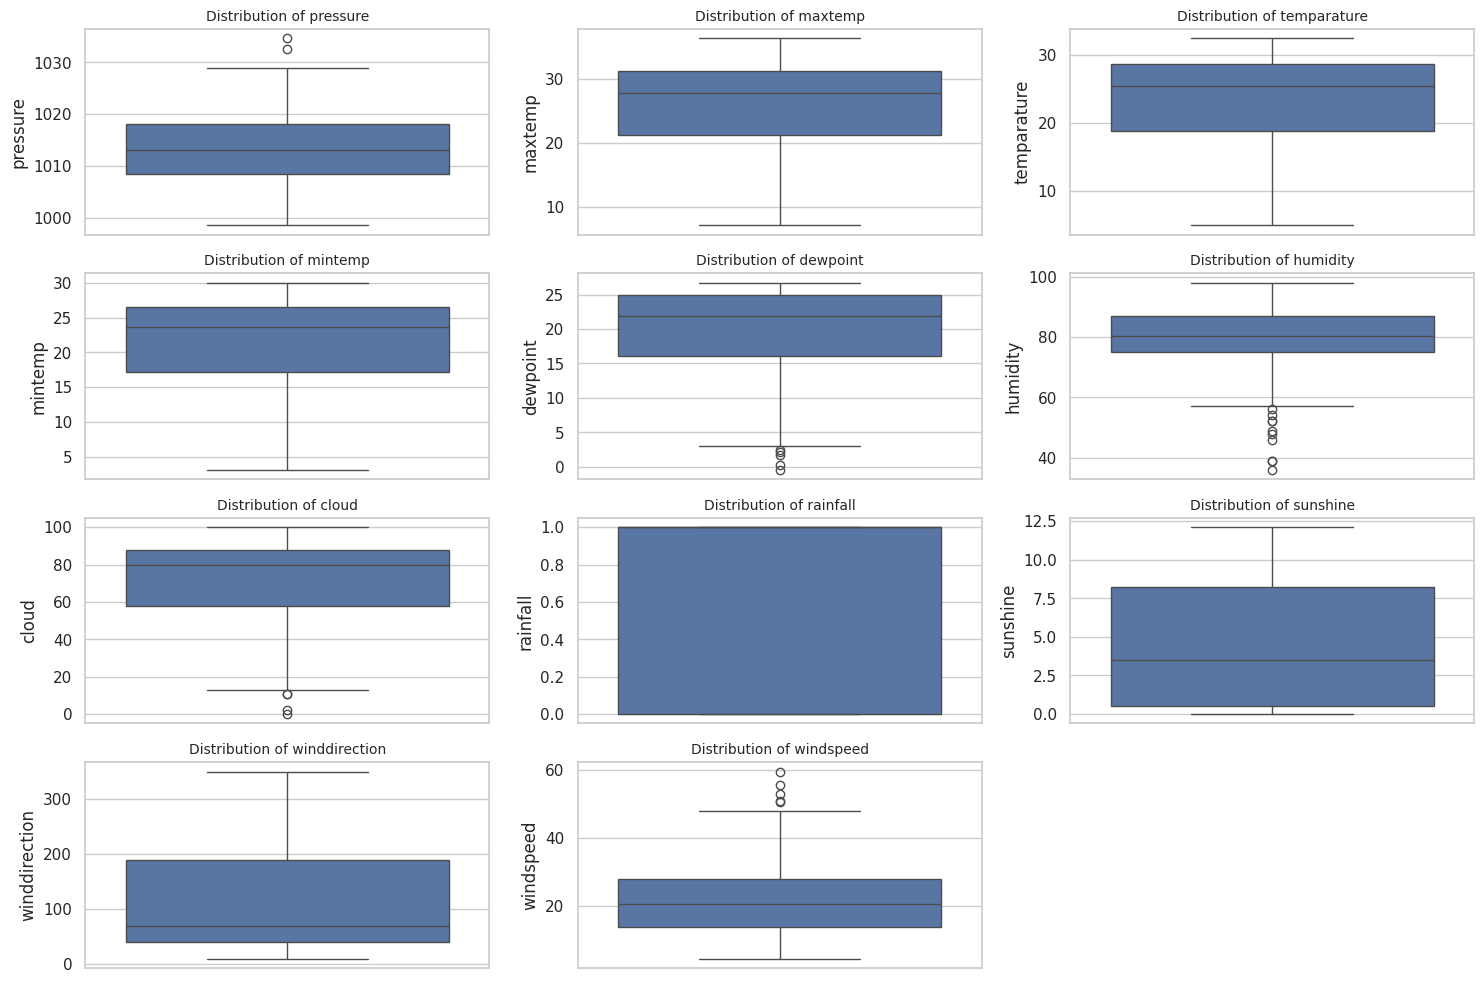

In [33]:
plt.figure(figsize=(15, 10))


columns = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
           'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed']


for i, column in enumerate(columns, 1):
    ax = plt.subplot(4, 3, i)
    sns.boxplot(data=dataset[column], ax=ax)
    plt.title(f"Distribution of {column}", fontsize=10)

plt.tight_layout()
plt.show()

In [34]:
dataset= dataset.drop(["maxtemp","temparature","dewpoint"],axis=1)

In [35]:
dataset.head()

,pressure,mintemp,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,16.8,72,49,1,9.3,80.0,26.3
1,1022.0,17.2,81,83,1,0.6,50.0,15.3
2,1019.7,18.0,95,91,1,0.0,40.0,14.2
3,1018.9,19.1,90,88,1,1.0,50.0,16.9
4,1015.9,20.2,95,81,1,0.0,40.0,13.7


In [36]:
print (dataset["rainfall"].value_counts())

rainfall
1    249
0    117
Name: count, dtype: int64


In [37]:
df_majority =dataset[dataset["rainfall"]==1]
df_minority= dataset[dataset["rainfall"]==0]

In [38]:
df_majority_downsampled= resample(df_majority,replace=False,n_samples=len(df_minority),random_state=42)

In [39]:
df_majority_downsampled.shape

(117, 8)

In [40]:
df_downsampled = pd.concat([df_majority_downsampled,df_minority])

In [41]:
df_downsampled.shape

(234, 8)

In [42]:
df_downsampled["rainfall"].value_counts()

,count
rainfall,
1,117
0,117


In [43]:
X= df_downsampled.drop("rainfall",axis=1)
Y= df_downsampled["rainfall"]

In [44]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)

In [45]:
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf={
    "n_estimators":[50,100,200],
    "max_depth":[None,10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}



In [56]:
grid_search_rf= GridSearchCV(estimator=rf_model,param_grid=param_grid_rf,cv=5)
grid_search_rf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [57]:
best_rf_model= grid_search_rf.best_estimator_
print( grid_search_rf.best_params_)

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [58]:
cv_scores= cross_val_score(best_rf_model,X_train,Y_train,cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.73684211 0.71052632 0.81081081 0.94594595 0.75675676]
Mean cross-validation score: 0.792176386913229


In [67]:
y_pred = best_rf_model.predict(X_test)

print("Test set Accuracy:", accuracy_score(Y_test, y_pred))
print("Test set Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

Test set Accuracy: 0.851063829787234
Test set Confusion Matrix:
 [[23  3]
 [ 4 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87        26
           1       0.85      0.81      0.83        21

    accuracy                           0.85        47
   macro avg       0.85      0.85      0.85        47
weighted avg       0.85      0.85      0.85        47



In [68]:
input_data = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)

input_df = pd.DataFrame([input_data], columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine','winddirection', 'windspeed'])

In [69]:
input_df

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1015.9,19.9,95,81,0.0,40.0,13.7


In [71]:
# Eğitimdeki tüm feature'ları içeren bir dataframe oluştur
missing_features = set(X_train.columns) - set(input_df.columns)
extra_features = set(input_df.columns) - set(X_train.columns)

print("Eksik feature'lar:", missing_features)
print("Fazla feature'lar:", extra_features)

# Eksik feature'ları ekle (default değerle)
for feature in missing_features:
    input_df[feature] = 0  # veya uygun bir default değer

# Fazla feature'ları kaldır
input_df = input_df[X_train.columns]

Eksik feature'lar: {'mintemp'}
Fazla feature'lar: {'dewpoint'}


In [72]:
prediction = best_rf_model.predict(input_df)

In [73]:
print ("Prediction:", prediction)

Prediction: [1]


In [74]:
prediction = best_rf_model.predict(input_df)
print("Prediction result:", "Rainfall" if prediction[0] == 1 else "No Rainfall")

Prediction result: Rainfall


In [75]:
model_data = {"model": best_rf_model, "feature_names": X.columns.tolist()}

with open("rainfall_prediction_model.pkl", "wb") as file:
  pickle.dump(model_data, file)

In [76]:
import pickle
import pandas as pd

In [77]:
with open("rainfall_prediction_model.pkl", "rb") as file:
  model_data = pickle.load(file)

In [78]:
model = model_data["model"]
feature_names = model_data["feature_names"]

In [79]:
nput_data = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)

input_df = pd.DataFrame([input_data], columns=feature_names)

In [80]:
prediction = best_rf_model.predict(input_df)
print("Prediction result:", "Rainfall" if prediction[0] == 1 else "No Rainfall")

Prediction result: Rainfall
